In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Data Collection ###

In [10]:
train_data = pd.read_excel(r'Data_Train.xlsx') #r is used to convert normal string to raw string
# train_data is our raw data

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [14]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


### Data Cleaning ###

In [17]:
# Data cleaning may involve a lot of steps. We can start with some basic steps like missing values, duplicate values, etc.

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### From the above info about train_data, we can see that Route and Total_Stops columns have lesser non-null values in comparison to other columns. This implies that these columns may have missing values. #####

In [22]:
train_data.isnull() #returns a boolean value

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [24]:
train_data.isnull().sum() #returns how many null values are present and in which column/s

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### The above table conveys that there is one missing value in each Route and Total_Stops column/s. Since the count of missing values is really low, we can drop the row/rows where these values are missing. #####

In [27]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


##### As we can see above that both the null values belong to this row, we can drop this row from the data frame. #####

In [30]:
train_data.dropna(inplace=True)

In [32]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [34]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [36]:
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


##### We'll now move on to Data Pre-processing #####

In [269]:
data = train_data.copy() #Creating a copy of the data to perform operations

In [271]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [273]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


##### What we can do is, split the Date_of_Journey column in three separate columns - Journey Date, Journey Month and Journey Year. This would make it easier for us to feed this data into a ML model and get meaningful insights from it. #####

##### Also, Date_of_Journey, Dep_Time and Arrival_Time have the datatype as object. We need to change it to timestamp for better calculation. ##### 

In [277]:
def change_to_datetime(col):
    data[col] = pd.to_datetime(data[col]) #function written to change the datatype from object/string to datetime

In [279]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [281]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_to_datetime(feature)

In [283]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [285]:
data['Journey_year'] = data['Date_of_Journey'].dt.year 
data['Journey_month'] = data['Date_of_Journey'].dt.month
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [287]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-11 05:50:00,2025-01-11 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9


##### We have created three new columns for better model training. We will now move towards processing the columns Dep_Time and Arrival_Time for better understanding. #####

In [290]:
#Extracting departure hour & minute and arrival hour & minute
def extract_hour_and_minute(df, col):
    df[col + "_Hour"] = df[col].dt.hour
    df[col + "_Minute"] = df[col].dt.minute
    return df.head(5)

In [292]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-11 05:50:00,2025-01-11 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-01-11 18:05:00,2025-01-11 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-01-11 16:50:00,2025-01-11 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1


In [294]:
extract_hour_and_minute(data, "Dep_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-11 05:50:00,2025-01-11 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-01-11 18:05:00,2025-01-11 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-01-11 16:50:00,2025-01-11 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1,16,50


In [296]:
extract_hour_and_minute(data, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-11 05:50:00,2025-01-11 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-01-11 18:05:00,2025-01-11 23:30:00,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-01-11 16:50:00,2025-01-11 21:35:00,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35


In [298]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-01-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-01-11 05:50:00,2025-01-11 13:15:00,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-01-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


In [300]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop , axis = 1, inplace = True)

In [302]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


### Data Analysis ###
##### Problem statement 1: Analysing when do most of the flights take off #####

In [305]:
data['Dep_Time_Hour'].value_counts() #This gives a fair idea about the busiest departure hour

Dep_Time_Hour
9     915
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: count, dtype: int64

##### The above data shows that most of the flights take off in the morning, but to make it appealing, we'll aim at drawing a chart which showcases the same data, in a better manner. #####

In [308]:
# We are writing a function to determine the time of day (morning, evening, night, etc)
def flight_dep_time(x):
    if (x>4) and (x<=8):
        return "Early Morning"
    elif (x>8) and (x<=12):
        return "Morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late Night"

<Axes: xlabel='Dep_Time_Hour'>

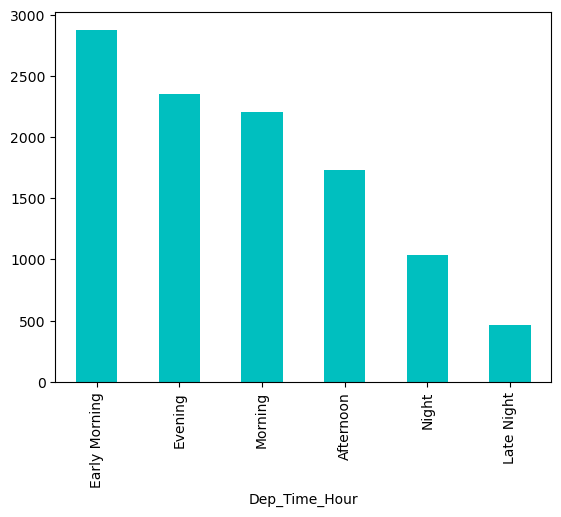

In [310]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().plot(kind='bar', color='c')

##### The above bar chart shows that most of the flights take off during early morning. #####

In [208]:
# To make the chart more interactive, we'll use plotly.
!pip install plotly
!pip install chart_studio

In [210]:
!pip install cufflinks

In [312]:
import plotly 
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
cf.go_offline()

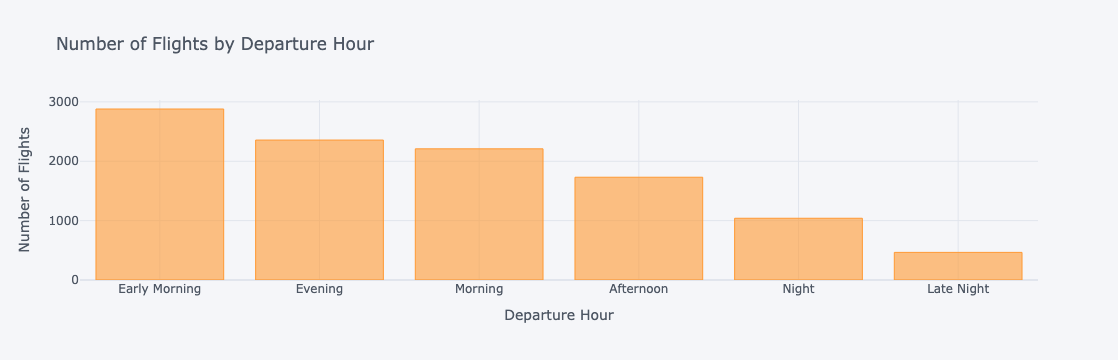

In [314]:
data['Dep_Time_Hour'].apply(flight_dep_time).value_counts().iplot(
    kind='bar',
    xTitle='Departure Hour',
    yTitle='Number of Flights',
    title='Number of Flights by Departure Hour'
)

##### Data Processing: Prepping the Duration column for analysis #####

In [318]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,2019,6,9,9,25,4,25


##### The duration column is a string object which is a mix of two elements: Hours and Minutes. But there would be flights which take some hours and 0 minutes or 0 hours and some minutes. Therefore, we need to process the Duration column accordingly. #####

In [267]:
def preprocess_duration(x):
    if 'h' not in x:
        return "0h" + " " + x
    elif 'm' not in x:
        return x + " " + "0m"
    else:
        return x

In [321]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [323]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,2019,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,2019,3,1,16,50,21,35


In [325]:
data['Duration_Hours'] = data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))


In [329]:
data['Duration_Minutes'] = data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [331]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_year,Journey_month,Journey_day,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,5,1,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,2019,6,9,9,25,4,25,19,0
